In [32]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [19]:
data = pd.read_csv('data.csv')
data=data.drop(["User id"],axis=1)
data

,Age,Incoming,Student,Credit Rating,Buying
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,"[31,40]",high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,"[31,40]",low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [39]:
feature = data[['Age','Incoming','Student','Credit Rating']]
vec = DictVectorizer()
X = vec.fit_transform(feature.to_dict(orient='record'))

enc = preprocessing.LabelEncoder()
Y = enc.fit_transform(data[['Buying']])

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

D:\Zstudy\envs\JX\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Zstudy\envs\JX\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
feature_names = ['Age','Incoming','Student','Credit Rating']
target_names = ['yes','no']

def plot_tree(clf, feature_names, target_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

[Text(0.5555555555555556, 0.875, 'X[0] <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.3333333333333333, 0.625, 'X[4] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2222222222222222, 0.375, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.625, 'X[8] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

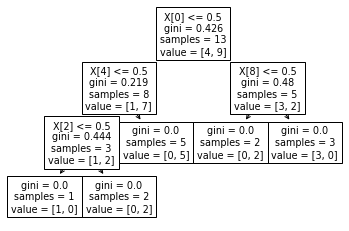

In [41]:
tree.plot_tree(clf)

In [42]:
prediction = clf.predict(X)
print(prediction)

[0 0 1 1 1 0 1 0 1 1 1 1 1]
